You are given the root of a binary tree. We install cameras on the tree nodes where each camera at a node can monitor its parent, itself, and its immediate children.

Return the minimum number of cameras needed to monitor all nodes of the tree.

 

Example 1:

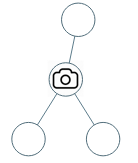

Input: root = [0,0,null,0,0]
Output: 1
Explanation: One camera is enough to monitor all nodes if placed as shown.

Example 2:

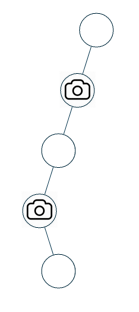

Input: root = [0,0,null,0,null,0,null,null,0]
Output: 2
Explanation: At least two cameras are needed to monitor all nodes of the tree. The above image shows one of the valid configurations of camera placement.

 

Constraints:

    The number of nodes in the tree is in the range [1, 1000].
    Node.val == 0



Approach 1: Dynamic Programming

Intuition

Let's try to cover every node, starting from the top of the tree and working down. Every node considered must be covered by a camera at that node or some neighbor.

Because cameras only care about local state, we can hope to leverage this fact for an efficient solution. Specifically, when deciding to place a camera at a node, we might have placed cameras to cover some subset of this node, its left child, and its right child already.

Algorithm

Let solve(node) be some information about how many cameras it takes to cover the subtree at this node in various states. There are essentially 3 states:

    [State 0] Strict subtree: All the nodes below this node are covered, but not this node.
    [State 1] Normal subtree: All the nodes below and including this node are covered, but there is no camera here.
    [State 2] Placed camera: All the nodes below and including this node are covered, and there is a camera here (which may cover nodes above this node).

Once we frame the problem in this way, the answer falls out:

    To cover a strict subtree, the children of this node must be in state 1.
    To cover a normal subtree without placing a camera here, the children of this node must be in states 1 or 2, and at least one of those children must be in state 2.
    To cover the subtree when placing a camera here, the children can be in any state.


In [ ]:
class Solution(object):
    def minCameraCover(self, root):
        def solve(node):
            # 0: Strict ST; All nodes below this are covered, but not this one
            # 1: Normal ST; All nodes below and incl this are covered - no camera
            # 2: Placed camera; All nodes below this are covered, plus camera here

            if not node: 
                return 0, 0, float('inf')
            
            L = solve(node.left)
            R = solve(node.right)

            dp0 = L[1] + R[1]
            dp1 = min(L[2] + min(R[1:]), R[2] + min(L[1:]))
            dp2 = 1 + min(L) + min(R)

            return dp0, dp1, dp2

        return min(solve(root)[1:])

Intuition

Instead of trying to cover every node from the top down, let's try to cover it from the bottom up - considering placing a camera with the deepest nodes first, and working our way up the tree.

If a node has its children covered and has a parent, then it is strictly better to place the camera at this node's parent.

Algorithm

If a node has children that are not covered by a camera, then we must place a camera here. Additionally, if a node has no parent and it is not covered, we must place a camera here.

In [ ]:
class Solution(object):
    def minCameraCover(self, root):
        self.ans = 0
        covered = {None}

        def dfs(node, par=None):
            if node:
                dfs(node.left, node)
                dfs(node.right, node)

                if (par is None and node not in covered 
                    or node.left not in covered 
                    or node.right not in covered
                    ):
                    self.ans += 1
                    covered.update({node, par, node.left, node.right})

        dfs(root)
        return self.ans